In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("dm_office_sales.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [11]:
df.describe(include = "all", percentiles=[0.01,0.25,0.5,0.75,0.99])

,division,level of education,training level,work experience,salary,sales
count,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000
unique,5,5,NaN,NaN,NaN,NaN
top,office supplies,associate's degree,NaN,NaN,NaN,NaN
freq,252,412,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.262000,6.14200,90264.207000,339833.846000
std,NaN,NaN,0.925317,2.94797,17398.617174,108555.773316
min,NaN,NaN,0.000000,0.00000,41660.000000,53067.000000
1%,NaN,NaN,0.000000,0.00000,52177.320000,101067.420000
25%,NaN,NaN,1.000000,4.00000,77584.000000,259257.500000
50%,NaN,NaN,1.000000,6.00000,89946.000000,338145.500000


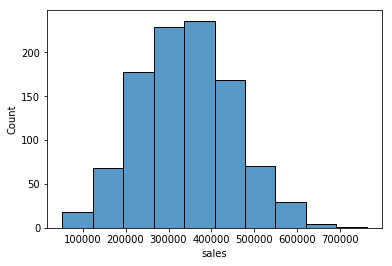

In [15]:
sns.histplot(data=df, x='sales', bins = 10)

In [17]:
np.histogram(df["sales"],bins = 10)

(array([ 18,  68, 177, 229, 236, 168,  70,  29,   4,   1], dtype=int64),
 array([ 53067., 123908., 194749., 265590., 336431., 407272., 478113.,
        548954., 619795., 690636., 761477.]))

In [26]:
len(df[(df["sales"] >= 123909) & (df["sales"] < 194749)]["sales"])

17

In [27]:
194749 - 123909

70840

In [28]:
123909 - 53067

70842

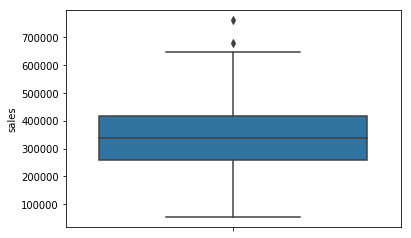

In [30]:
sns.boxplot(data = df, y = 'sales')

In [35]:
iqr = np.percentile(df["sales"], 75) - np.percentile(df["sales"], 25)

In [36]:
# 75%ile => 3rd quartile
# 25%ile => 1st quartile

In [37]:
iqr

155952.75

In [38]:
up = np.percentile(df["sales"], 75) + 1.5*iqr

In [39]:
up

649139.375

In [40]:
down = np.percentile(df["sales"],25) - 1.5*iqr

In [41]:
down

25328.375

In [42]:
df[df["sales"] > up]

,division,level of education,training level,work experience,salary,sales
103,computer software,associate's degree,3,15,159148,761477
797,computer hardware,some college,3,13,143988,677672


In [43]:
df[df["sales"] < down]

,division,level of education,training level,work experience,salary,sales


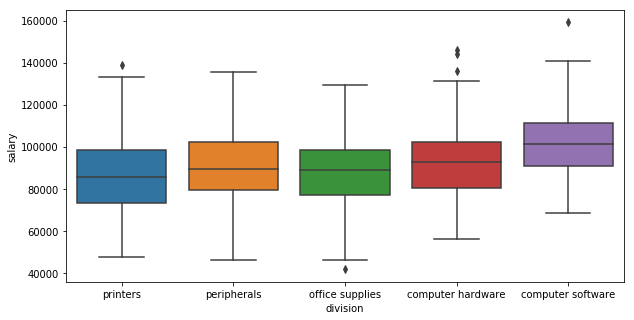

In [51]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, y = "salary", x = "division")

In [54]:
import warnings
warnings.filterwarnings("ignore")

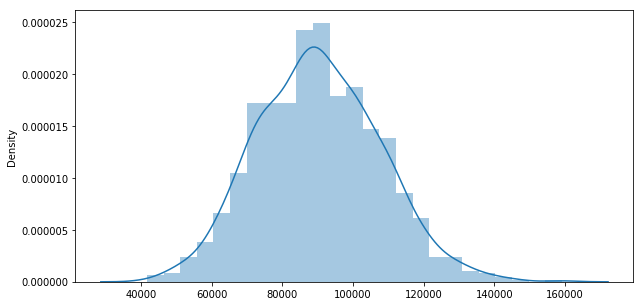

In [61]:
plt.figure(figsize = (10,5))
sns.distplot(x = df["salary"])

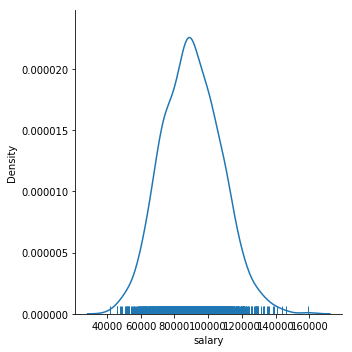

In [84]:
sns.displot(data = df, x = "salary", kind = "kde", rug = True)

In [ ]:
# P(X = 40000)
# P(X >40000 and X <120000) = area under the curve

In [71]:
std_sales = (df["sales"] - df["sales"].mean())/df["sales"].std()

In [72]:
std_sales.mean()

-1.7821855102795326e-16

In [73]:
std_sales.std()

0.9999999999999991

In [78]:
np.random.seed(1000)
np.random.normal(0, 1, size=20)

array([-0.8044583 ,  0.32093155, -0.02548288,  0.64432383, -0.30079667,
        0.38947455, -0.1074373 , -0.47998308,  0.5950355 , -0.46466753,
        0.66728131, -0.80611561, -1.19606983, -0.40596016, -0.18237734,
        0.10319289, -0.13842199,  0.70569237,  1.27179528, -0.98674733])

In [79]:
np.random.seed(1000)
np.random.normal(0, 1, size=20)

array([-0.8044583 ,  0.32093155, -0.02548288,  0.64432383, -0.30079667,
        0.38947455, -0.1074373 , -0.47998308,  0.5950355 , -0.46466753,
        0.66728131, -0.80611561, -1.19606983, -0.40596016, -0.18237734,
        0.10319289, -0.13842199,  0.70569237,  1.27179528, -0.98674733])

In [68]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

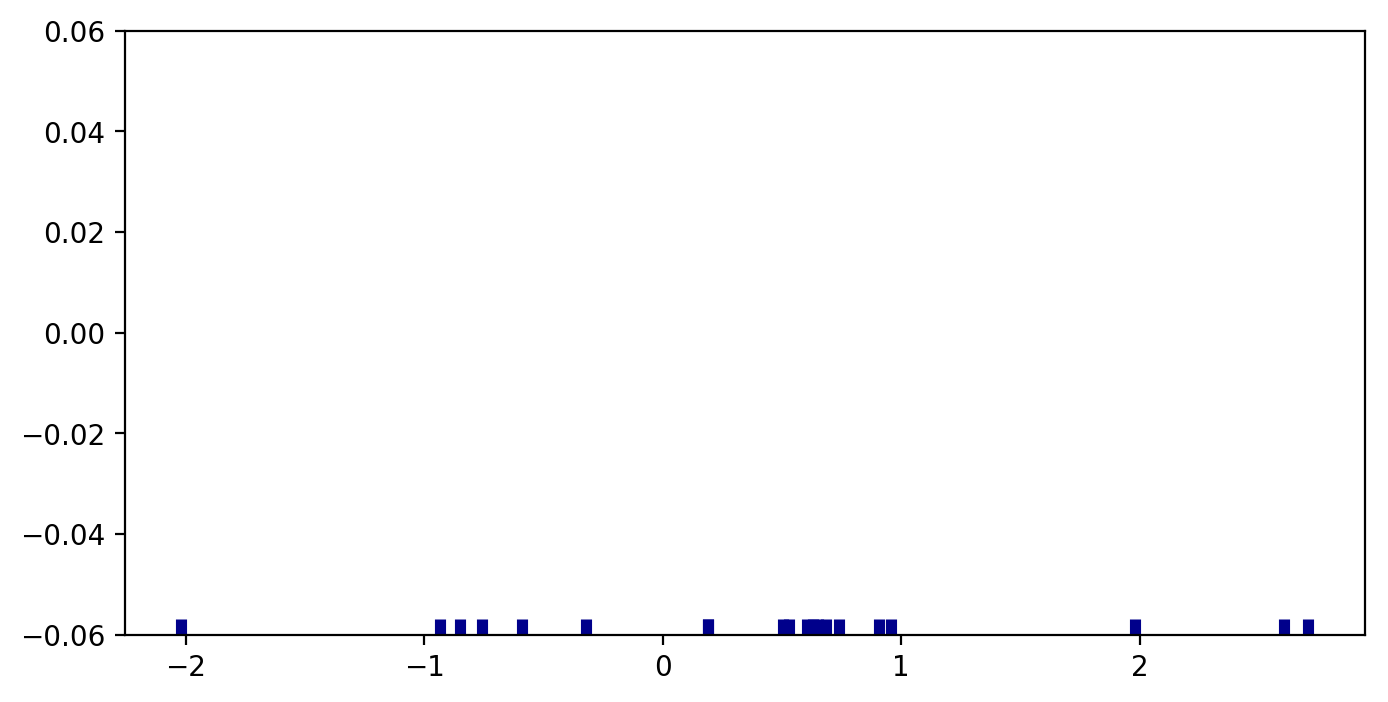

In [80]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4)

In [85]:
x

array([ 2.70684984,  0.62813271,  0.90796945,  0.50382575,  0.65111795,
       -0.31931804, -0.84807698,  0.60596535, -2.01816824,  0.74012206,
        0.52881349, -0.58900053,  0.18869531, -0.75887206, -0.93323722,
        0.95505651,  0.19079432,  1.97875732,  2.60596728,  0.68350889])

In [87]:
from scipy import stats

<Figure size 1600x800 with 0 Axes>

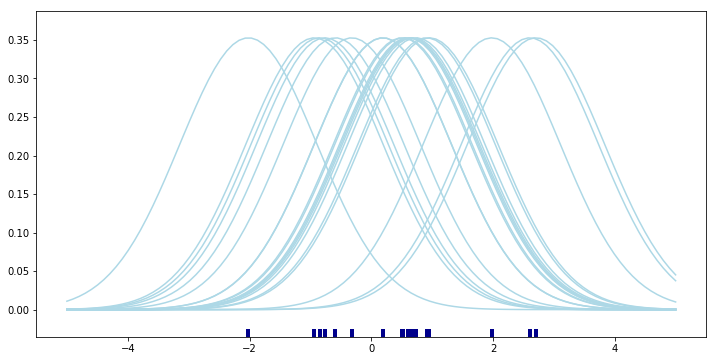

In [88]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

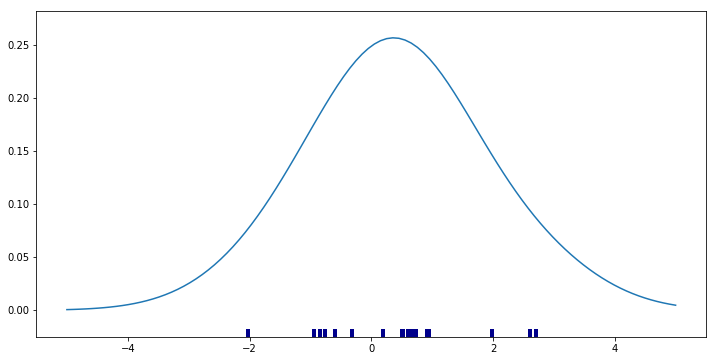

In [89]:
plt.figure(figsize=(8,4),dpi=200)
from scipy.integrate import trapz
plt.figure(figsize=(12,6))
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

In [91]:
df["level of education"].unique()

array(['some college', "associate's degree", 'high school',
       "bachelor's degree", "master's degree"], dtype=object)

In [96]:
df["division"].unique()

array(['printers', 'peripherals', 'office supplies', 'computer hardware',
       'computer software'], dtype=object)

## Categorical variables

## Nominal :  Division

## Ordinal : good < better < best

## High School < Graduate < Post Graduate < Phd

In [92]:
df["level of education"].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

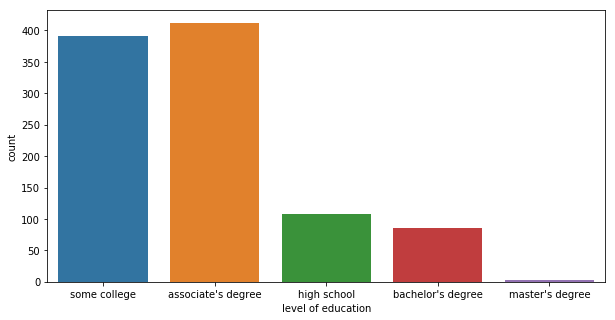

In [97]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "level of education")

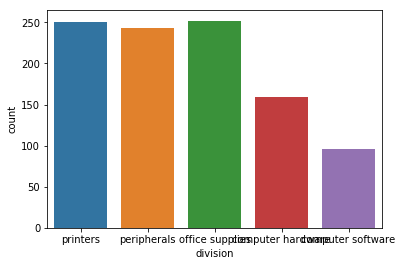

In [98]:
sns.countplot(data = df, x = "division")

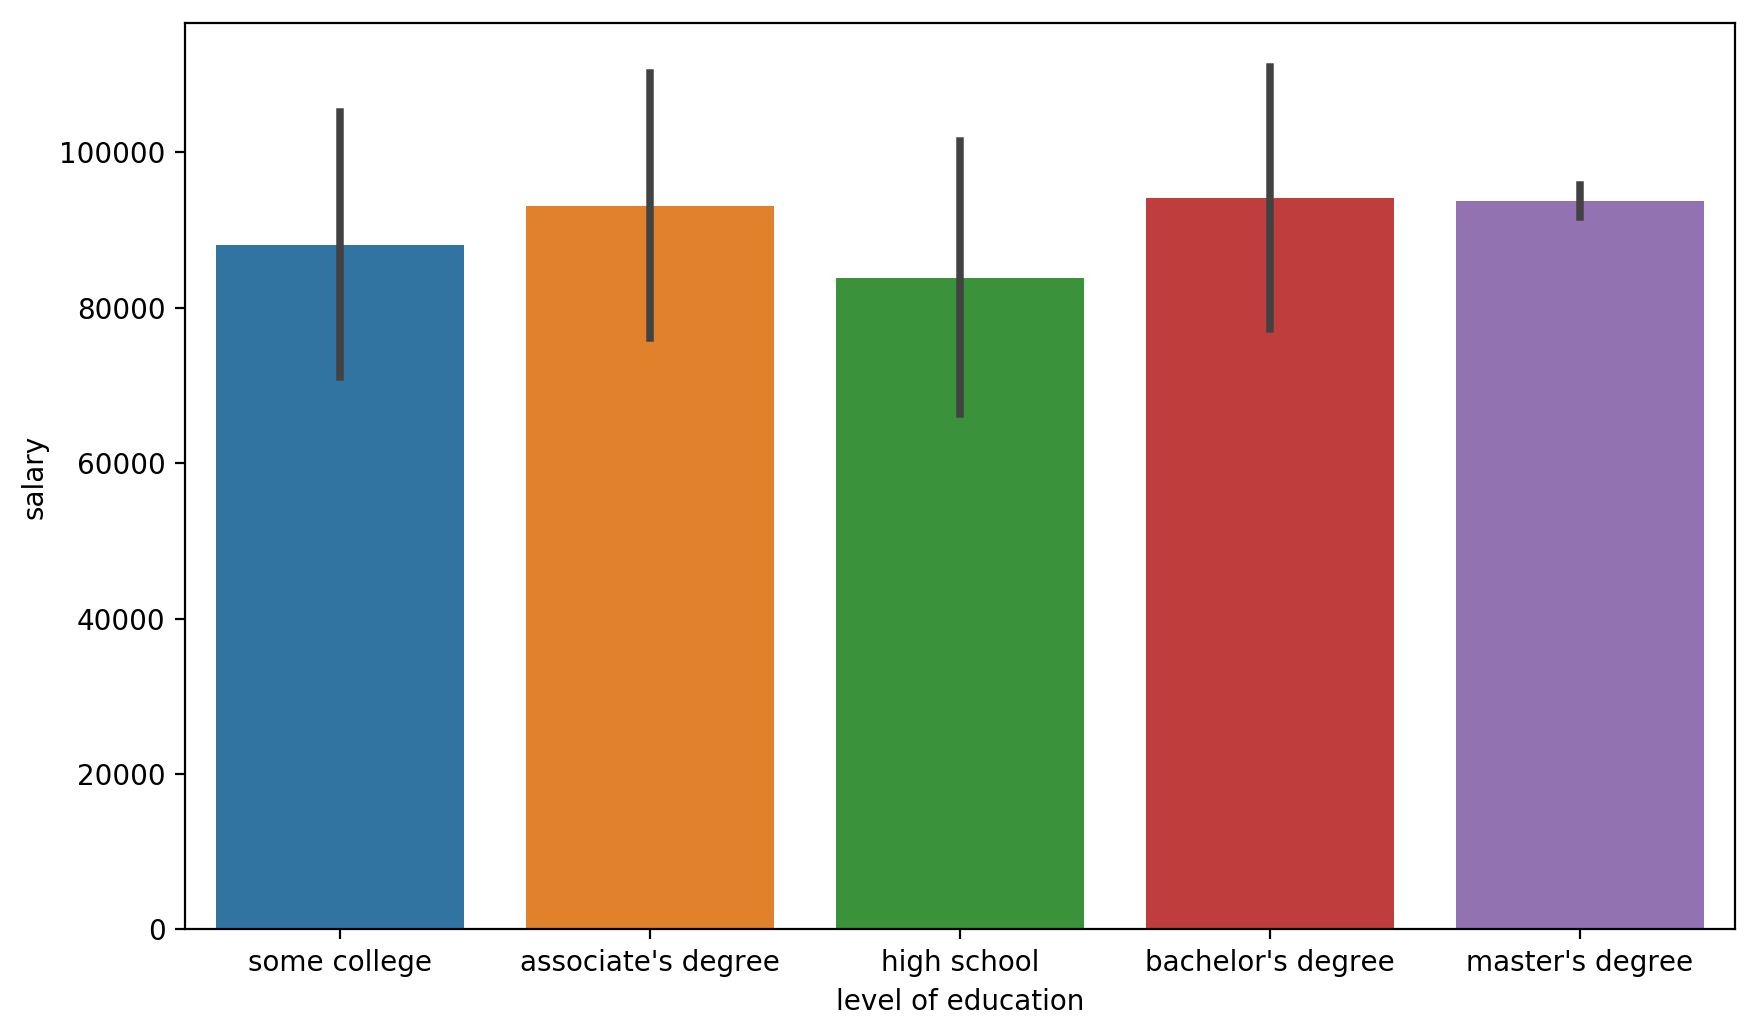

In [100]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,ci='sd')

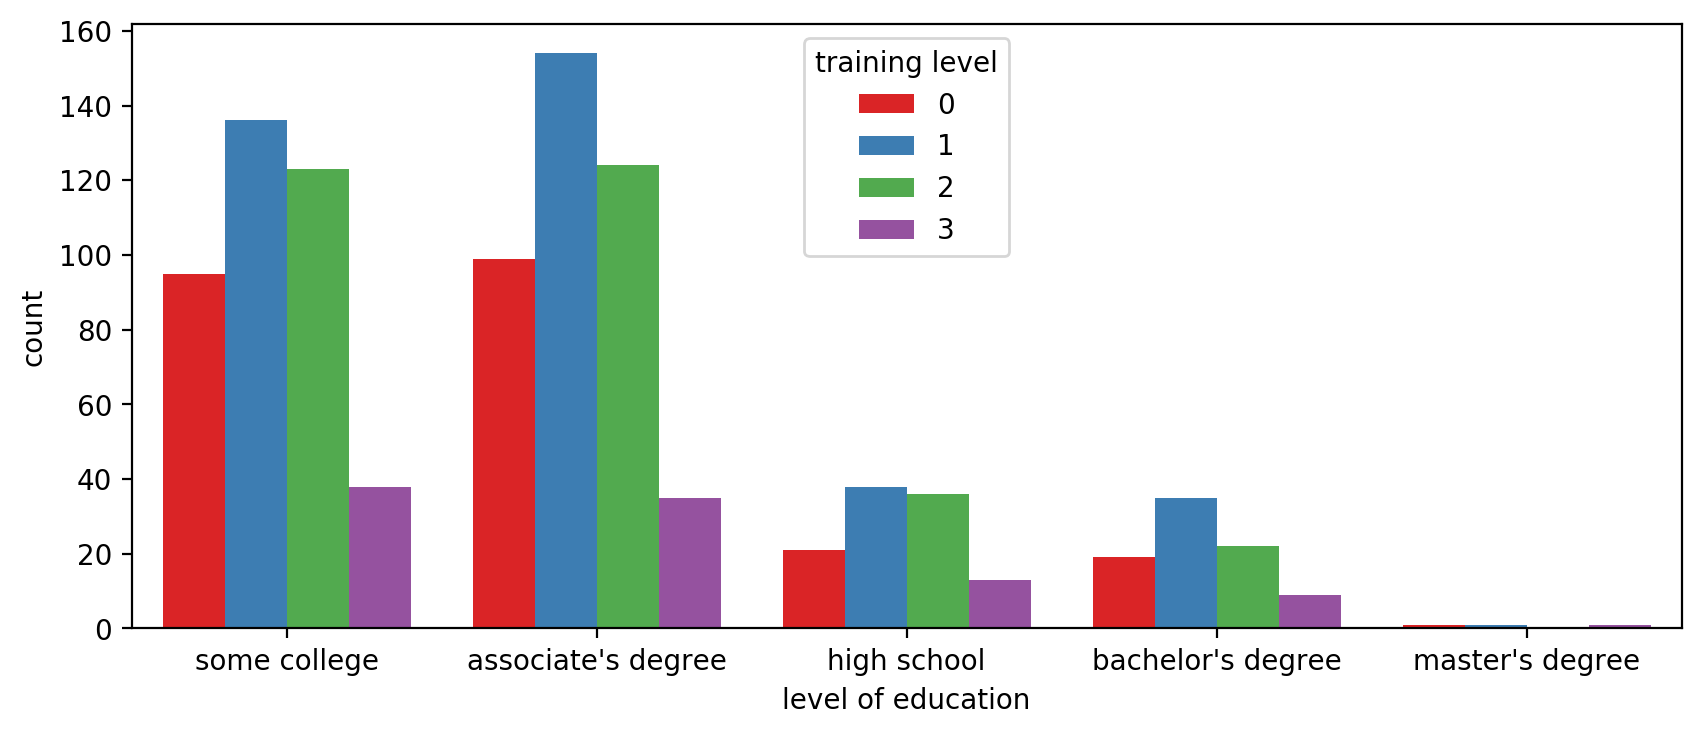

In [114]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',
              data=df,
              hue='training level', 
              dodge = True,
              saturation = 0.9,
              palette='Set1')

In [115]:
df1 = pd.read_csv("StudentsPerformance.csv")

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [118]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [119]:
df1.describe(include = "all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


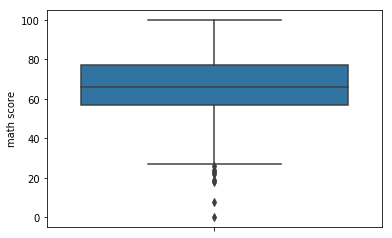

In [121]:
sns.boxplot(data = df1, y = "math score")

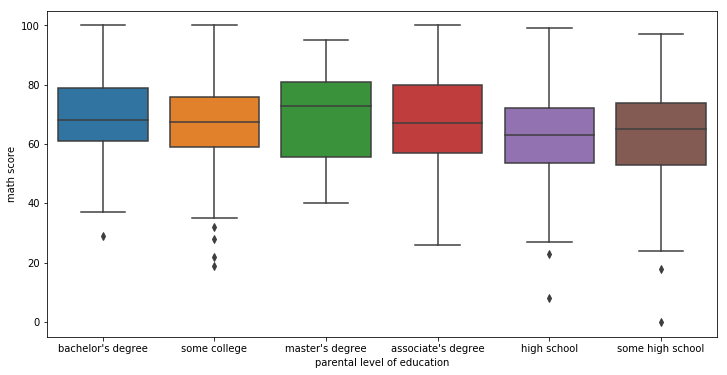

In [124]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df1)

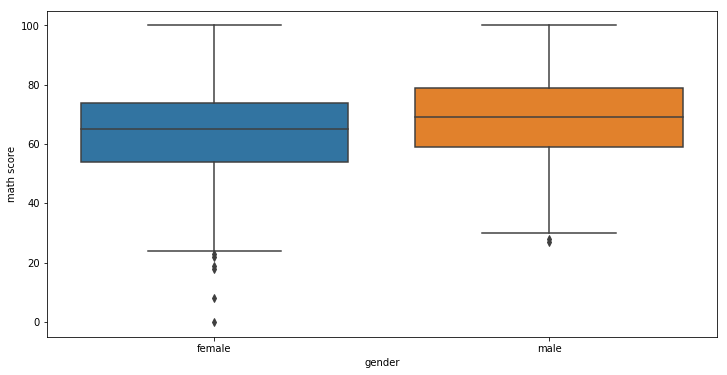

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(x='gender',y='math score',data=df1)

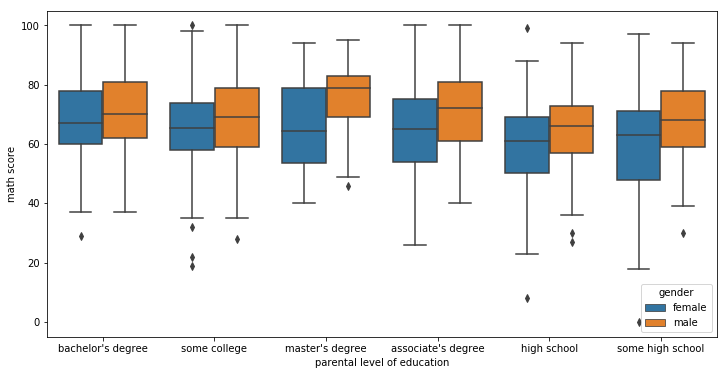

In [127]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df1,hue='gender')

In [130]:
malegender = df1[(df1["parental level of education"] == "master's degree") &
    (df1["gender"] == "male")]

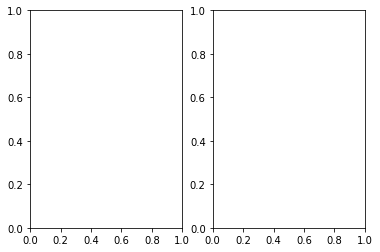

In [138]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

<Figure size 432x288 with 0 Axes>

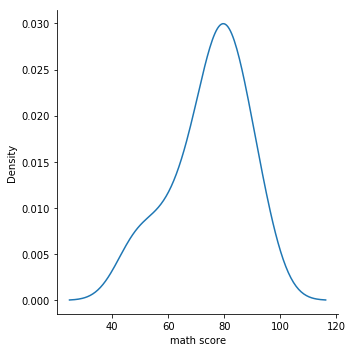

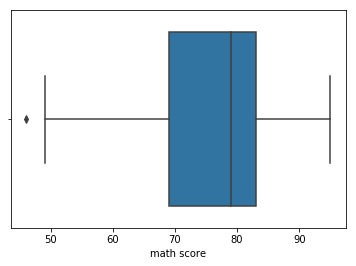

In [144]:
plt.figure()
sns.displot(data = malegender, x = "math score", kind = "kde")
plt.figure()
sns.boxplot(data = malegender, x = "math score")

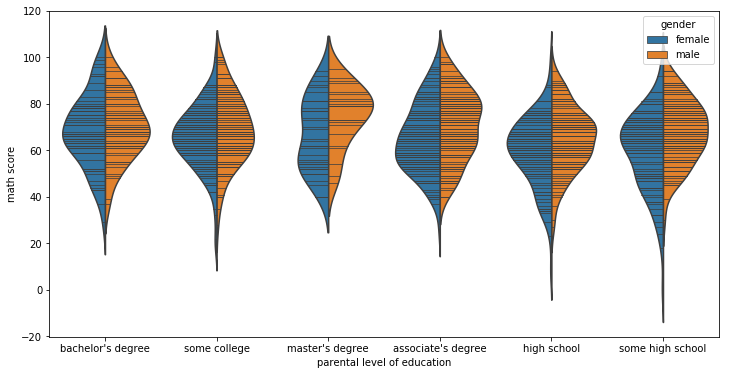

In [154]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',
               y='math score',
               data=df1,
               hue='gender',
               split=True,
               inner = "stick")

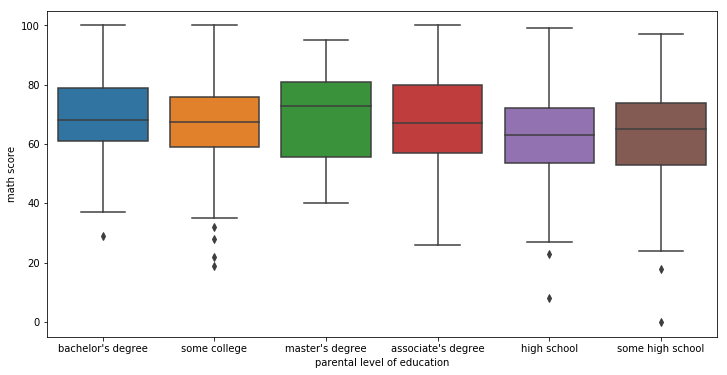

In [146]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df1)


Month              -   1    2    3      4     5    6
Advertising spends - 100$, $100  $1000  $1200 $150 $1100 

Qualitative variables/Discrete - Finite set of values (Dice roll) - 'parental level of education' 
Grade - A, A+, B, B+, C

Continuous/Quantitative - Math score - 10.5, 10, 25, 25.3

In [ ]:
Quantity - 10, 20, 30,

1Kg, 500 gm


Binomial distribution 

Bimodal 


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


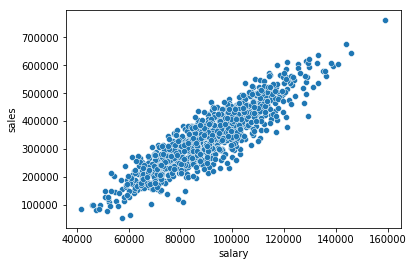

In [156]:
sns.scatterplot(data = df, x = "salary", y="sales")

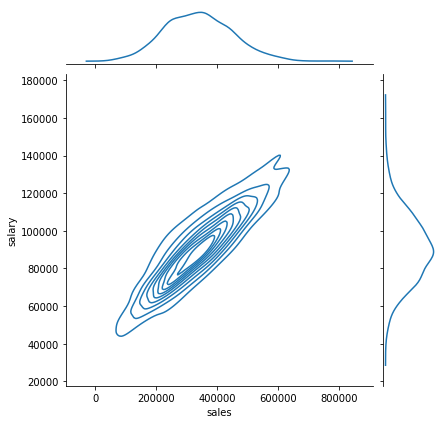

In [158]:
sns.jointplot(x='sales',y='salary',data=df, kind = "kde")

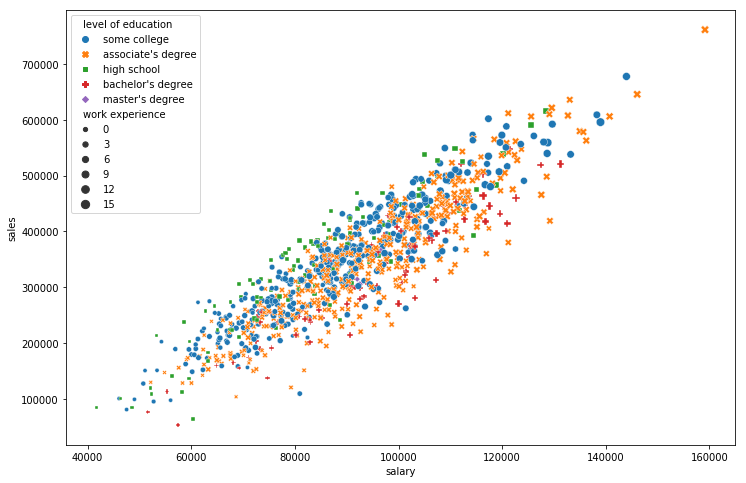

In [162]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,size='work experience',style='level of education',hue='level of education',s=100)